In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import healpy as hp
import matplotlib.pylab as plt

In [79]:
survey_length = 3.5 # days
# Define what we want the final visit ratio map to look like
target_map = fs.standard_goals()['y']
bfs = []
# Target number of observations
bfs.append(fs.Target_map_basis_function(filtername='y', target_map=target_map))
# Mask everything but the South
bfs.append(fs.Quadrant_basis_function(quadrants=['S'], azWidth=15., maxAlt=82.))
# throw in the depth percentile for good measure
bfs.append(fs.Depth_percentile_basis_function())

weights = np.array([1., 1., 1.])

survey = fs.Marching_army_survey(bfs, weights, npick=40)
scheduler = fs.Core_scheduler([survey])

In [80]:
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='y_marching_south.db')

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 114.6%Completed 2851 observations


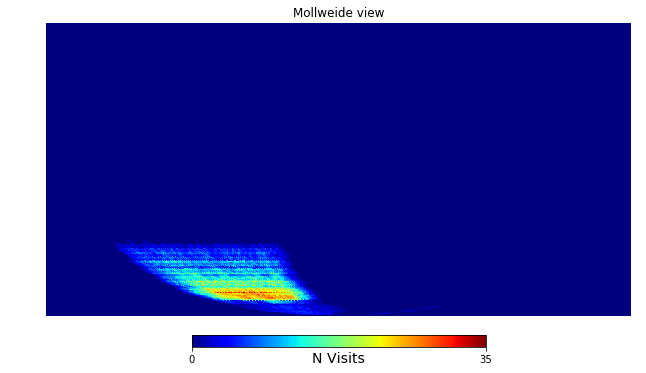

In [81]:
hp.mollview(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature, cmap='jet', unit='N Visits')

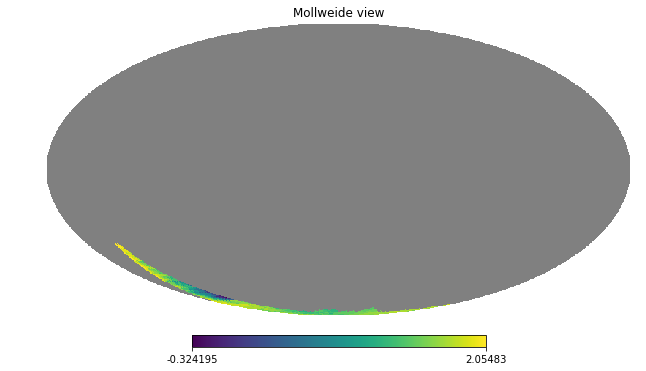

In [82]:
hp.mollview(scheduler.surveys[0].reward)

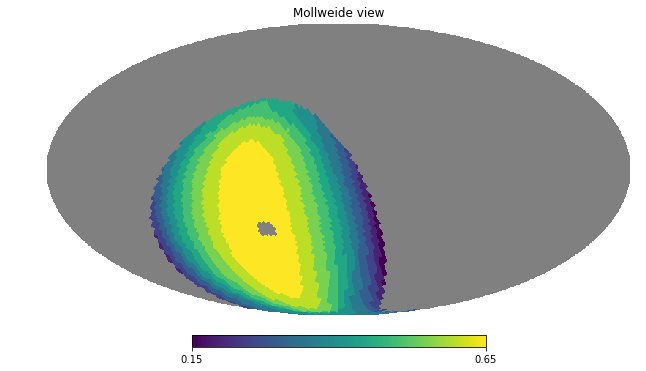

In [83]:
hp.mollview(scheduler.surveys[0].basis_functions[2]() )

In [84]:
scheduler.surveys[0].basis_functions

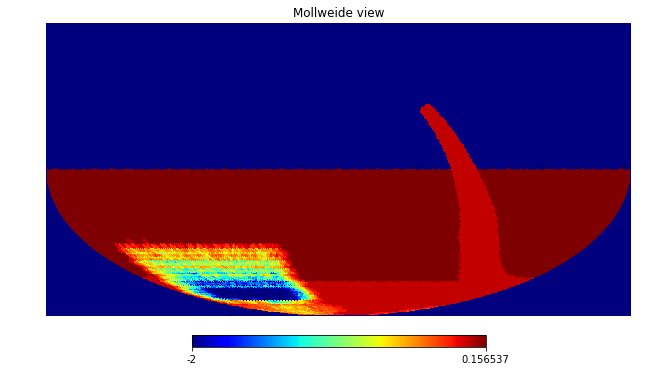

In [85]:
hp.mollview(scheduler.surveys[0].basis_functions[0](), cmap='jet', min=-2)

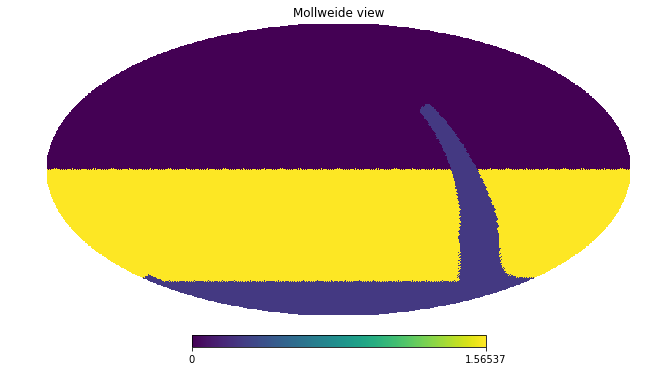

In [86]:
region = np.where(target_map > 0)
n_obs_goal = np.sum(target_map[region])
n_pix_obs = np.sum(scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature[region])
n_obs_goal, n_pix_obs
#hp.mollview(target_map-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature/n_pix_obs * n_obs_goal)
hp.mollview(target_map*n_pix_obs/n_obs_goal)
#np.unique(target_map*n_pix_obs/n_obs_goal)
#hp.mollview((target_map*n_pix_obs/n_obs_goal-scheduler.surveys[0].basis_functions[0].survey_features['N_obs'].feature)/10.)

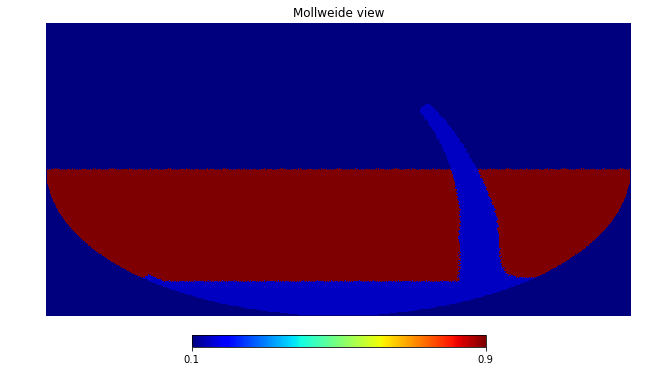

In [87]:
hp.mollview(target_map, min=0.1, cmap='jet')

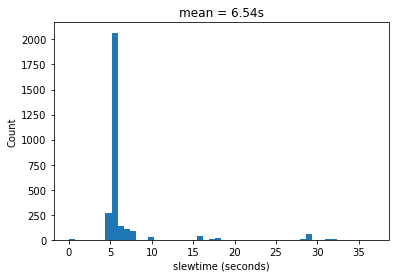

In [88]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

In [89]:
np.mean(observations['slewtime']), np.median(observations['slewtime'])

(6.543639473333501, 5.4410712300463917)

In [90]:
observations['slewtime'][0:80]

array([  0.        ,   5.49278016,   5.45051936,  29.0767528 ,
         5.38537472,   5.40918291,   5.44093551,   5.48327421,
         4.73708788,   5.5066942 ,   5.46365033,   5.42685757,
         5.40049846,   5.38321103,   5.37117986,   9.81134808,
         5.9624611 ,   5.35907692,   5.37943025,   5.40491164,
         5.43807543,   5.47943224,   5.52296666,   4.70614894,
         5.49263297,   5.44499938,   5.40262927,   5.36606452,
         5.70492289,   7.60207319,   4.7815871 ,   7.3695493 ,
         5.89570395,   5.35453235,   5.39703869,   5.44438969,
         4.81161607,   5.45466156,   5.39880838,   7.28985426,
        15.86080148,   5.49298474,   5.45093843,   5.41499003,
        28.9815646 ,   5.36985722,   5.38795793,   5.41037627,
         5.44163581,   5.48429033,   4.7423518 ,   5.50693449,
         5.46354902,   5.42669855,   5.40018699,   5.38265688,
         5.36990482,  10.01398417,   6.36096322,   5.35516788,
         5.37643412,   5.40292175,   5.43661085,   5.47

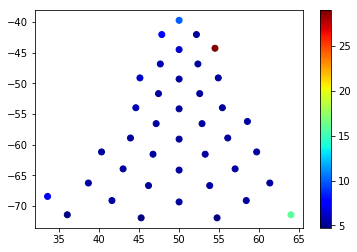

In [95]:
i1 = 40
i2=80
plt.scatter(observations['RA'][i1:i2], observations['dec'][i1:i2], c=observations['slewtime'][i1:i2], cmap='jet')
plt.colorbar()

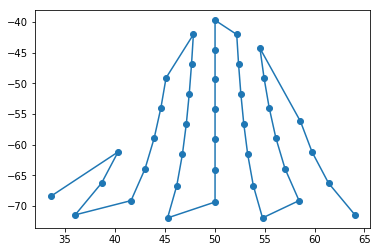

In [96]:
plt.plot(observations['RA'][i1:i2], observations['dec'][i1:i2], 'o-')


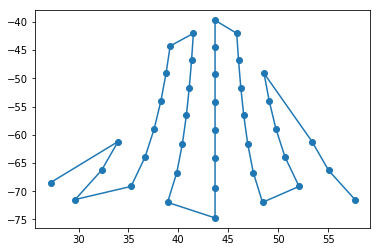

In [93]:
plt.plot(observations['RA'][0:40], observations['dec'][0:40], 'o-')